In [1]:
#Import necessary libraries:
import requests
import json
import time
import urllib3
import plotly.express as px
from pycountry_convert import country_name_to_country_alpha3
import pandas as pd
from tempfile import NamedTemporaryFile
import urllib.request as request
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [2]:
#Getting the Lato font 
github_url = 'https://github.com/google/fonts/blob/main/ofl/lato/Lato-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html
proxy_handler = request.ProxyHandler({'https':'http://nfekihromdha:@2changinpwd@proxy60-2.oddo.fr:8080'})
opener = request.build_opener(proxy_handler)
req = opener.open(url)
data = req.read()
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(data)
f.close()
prop = fm.FontProperties(fname=f.name)

In [3]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect("Driver={SQL Server};"
                      "Server=YDATLWCRM0002;"
                      "Database=DB_DW_CRM;"
                      "Trusted_Connection=yes;")

In [4]:
country="SELECT [Country_EN],[Account_Name],[Visit address] FROM [DB_DW_CRM].[dbo].[DWH_DIM_ACCOUNT]"
country = pd.read_sql_query(country, conn)
conn.close()
print('Connection closed')

<ipython-input-4-d7c3045b1694>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  country = pd.read_sql_query(country, conn)


Connection closed


In [5]:
df=country[country['Account_Name'].str.contains('test')==False]
df=df[df['Account_Name'].str.contains('Test')==False]
df=df[df['Visit address'].str.contains('test')==False]
df=df.replace({'':None})

In [120]:
len(df)

255096

In [320]:
def missingness_plot(data):
    df=pd.DataFrame()
    df['Present']=list(data.count())
    df['Present_Percent']=list(data.count()/len(data)*100)
    df['Missing']=list(data.isna().sum())
    df['Missing_Percent']=list(data.isna().mean())
    df['columns']=list(data.columns)
    fig = px.histogram(df,x='columns',y=['Missing','Present'],color_discrete_sequence=['#003C30','#55A185'],width=520)
    fig.update_layout(
    title_text='Missingness Bar Chart', # title of plot
    xaxis_title_text='', # xaxis label
    yaxis_title_text='Count')
    fig.update_traces(opacity=0.85)
    fig.update_xaxes(tickangle=-45)
    fig.show()

In [321]:
missingness_plot(df)

In [6]:
df2=df.dropna()

In [7]:
unique_countries=df2['Country_EN'].unique()

In [8]:
unique_countries

array(['Netherlands', 'Malta', 'United States of America (USA)',
       'Lithuania', 'Estonia', 'Finland', 'Germany', 'Luxembourg',
       'Norway', 'Switzerland', 'Spain', 'Sweden', 'Hungary',
       'United Kingdom', 'France', 'Italy', 'Denmark', 'Austria',
       'Belgium', 'Canada', 'Liechtenstein', 'China', 'San Marino',
       'Australia', 'Ireland', 'Japan', 'Qatar', 'Monaco', 'Jersey',
       'Scotland', 'Czech Republic', 'Portugal', 'Latvia', 'Algeria',
       'Bulgaria', 'India', 'Greece', 'Israel', 'Lebanon', 'Tunisia',
       "Korea, Democratic People's Republic of", 'Swaziland',
       'French Guiana', 'Taiwan', 'Gibraltar', 'Singapore', 'Hong Kong',
       'Korea, Republic of', 'Brazil', 'Cayman Islands', 'Bahamas',
       'New Caledonia', 'French Polynesia', 'United Arab Emirates',
       'Poland', 'Russian Federation', 'Cyprus', 'South Africa',
       'Morocco', 'Kuwait', 'Oman', 'Virgin Islands, British',
       'Not defined', 'Mauritius', 'Andorra', 'Bermuda', 'Mexico

In [279]:
def top_5_countries(data):
    cnt={}
    for country in list(data['Country_EN'].unique()):
        try:
            cnt[country]=data['Country_EN'].value_counts()[country]
        except:
            pass
    sorted_cnt=dict(sorted(cnt.items(), key=lambda item:item[1],reverse=True))
    top_5=[]
    i=0
    count=0
    while i<5:
        top_5.append(list(sorted_cnt.items())[i])
        i+=1
    for j in range(5,len(sorted_cnt)):
        count+=list(sorted_cnt.values())[j]
    top_5=dict(top_5)
    top_5=dict(sorted(top_5.items(), key=lambda item:item[1],reverse=False))
    items = list(top_5.items())
    items.insert(0,('Other',count))
    top_5=dict(items)
    return top_5

In [314]:
def top_5_countries_plot(data):
    dic=top_5_countries(data)
    fig =  go.Figure(go.Bar(
    x=list(dic.values()),
    y=list(dic.keys()),
    marker_color=["#C96048","#2E5144","#88A682","#55A185","#272529",'#003C30'],
    name='Country_EN',
    orientation='h'
    ),layout={'title': 'Top 5 frequent countries'})
    fig.update_layout( hoverlabel=dict(
        bgcolor="#F7F2EE",
        font_size=16,
        font_family='Lato-Light'
    ),
    title=dict(font_size=23,font_family='Lato-Regular'),
    xaxis_title_text='Number of accounts in each country', # xaxis label
    yaxis_title_text='Country',)
    fig.update_traces(opacity=0.85)
    fig.show()

In [315]:
#import 
import plotly.graph_objects as go
import numpy as np
top_5_countries_plot(df2)

In [163]:
from wordcloud import WordCloud
from os import path
import matplotlib.pyplot as plt
from PIL import Image

In [177]:
mask = np.array(Image.open(path.join(r'C:\Users\nfekihromdha\OneDrive - ODDO BHF\Bureau', "img.png")))

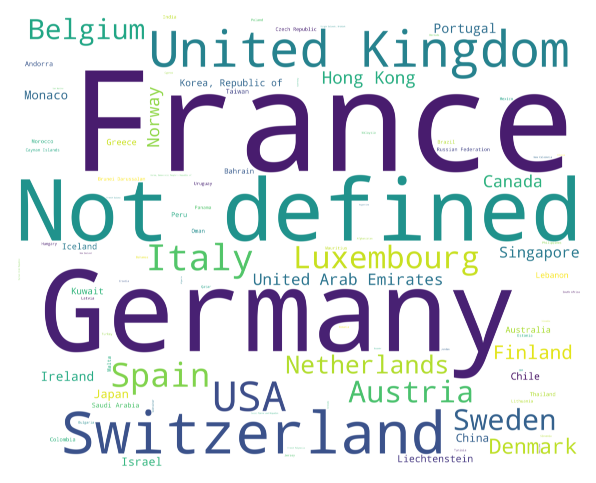

In [324]:
#mask = np.array(Image.open(r'C:\Users\nfekihromdha\Downloads\img.png'))
wc = WordCloud(mask=mask,background_color="white",width=10000,min_font_size=20, 
                      height=8000,contour_color='#003C30')
wc.generate_from_frequencies(sorted_cnt)
plt.figure(dpi=150)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [133]:
def get_continent(col):
    try:
        cn_a3_code =  country_name_to_country_alpha3(col)
    except:
        cn_a3_code = 'Unknown' 
    return (cn_a3_code)

In [134]:
df2['Country_nm']=df2['Country_EN'].apply(get_continent)

In [135]:
df2['Country_EN']=df2['Country_EN'].replace({'United States of America (USA)':'USA','Scotland':'GBR','The Netherlands':'Netherlands'})
df2['Country_nm']=df2['Country_EN'].apply(get_continent)

In [449]:
import pickle
with open('validAdress', 'rb') as f1:
    validAdress = pickle.load(f1)
with open('invalidAdress', 'rb') as f2:
    invalidAdress = pickle.load(f2)

In [361]:
def pie_Chart_adresses(data,validAdress,invalidAdress):
    
    labels = ['Invalid addresses', 'Valid addresses']
    x=round((len(invalidAdress)/len(data))*100)
    y=round((len(validAdress)/len(data))*100)
    pourcentages = [x,y]
    fig =  go.Figure(data=[go.Pie(labels=labels, values=pourcentages, pull=[0, 0.07])],layout={'title': 'Percent of Invalid Adresses'})
    fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(colors=['#003C30','#55A185']))
    fig.update_layout( hoverlabel=dict(
        bgcolor="#F7F2EE"
    ),
    title=dict(font_size=23,font_family='Lato-Regular'))
    fig.show()

In [362]:
pie_Chart_adresses(df2,validAdress,invalidAdress)

### Exploring messy data and missingness in invalid adresses

In [390]:
#nombre max de composantes des addresses:
max=0
for i in invalidAdress:
    s=i.split()
    if len(s)>max:
        max=len(s)

In [391]:
max

34

In [397]:
#la plus longue adresse:
plus_longue_adresses=[]
for i in invalidAdress:
    s=i.split()
    if len(s)==max:
        plus_longue_adresses.append(i)

In [396]:
plus_longue_adresses

[' 5 avenue de Bourgogne BP 36, 21802 Dijon | 5 avenue de BourgogneBP 36, 21802 Dijon | BFC Banque Privée - Pôle Gestion Sous Mandat  5 avenue de Bourgogne – BP 63, 21802 Quetigny']

In [403]:
#plus_courte_adresses
plus_courte_adresses=[]
for i in invalidAdress:
    s=i.split()
    if len(s)==1:
        plus_courte_adresses.append(i)
print(plus_courte_adresses) #missing addresses
missing_=len(plus_courte_adresses)
missing_

[' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' ,', ' -,', ' .,', ' ,', ' ,']


82

In [418]:
different_sizes=[]
for i in invalidAdress:
    s=i.split()
    if len(s)<=max:
        different_sizes.append(len(s))

In [420]:
print(set(different_sizes))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34}


In [430]:
#Exploring the other types of missingness
occ_2=0
occ_3=0
len2=[]
len3=[]
for i in invalidAdress:
    s=i.split()
    if len(s)==2:
        len2.append(i)
        occ_2+=1
    if len(s)==3:
        len3.append(i)
        occ_3+=1

In [575]:
print(len2)
len(len2)

[' *, *', ' -, -', ' -, -', ' fdfff, fff', ' Appieto, 20167', ' BP30836, 98895', ' BP66131, 35671', ' Postfach, 8058', ' Zugspitzstrasse140, 86165', ' Marius-Eriksen-Strasse1, 17291', ' XX, 75009', ' poiuytreza, 75000', ' Oustry, 81300', ' Oustry, 81300', ' Charles-de-Gaulle-Platz1, 50679', ' Charles-de-Gaulle-Platz1, 50679', ' Charles-de-Gaulle-Platz1, 50679', ' Charles-de-Gaulle-Platz1, 50679', ' Aeschengraben21, 4001', ' Strawinskylaan1203, 1077', ' Galusstrasse 4,', ' ben.foster@teneobluerubicon.com, 9', ' vfvf, 75', ' www.Norican.com, 1145', ' Hamburg, 52483', ' Dublin, 54836', ' Brazil, 247458', ' xxxxxx, 123']


28

In [434]:
print(len3)

[' Zugspitzstrasse140, 86165 Augsburg', ' xx, xx Bergkamen', ' Hovedvejen2, 2600 GLOSTRUP', ' Lissin 27,  Tel-Aviv', ' Mythenquai 50/60,  Paris', ' fontaine, F53100 Fontaine-Daniel', ' ., | .,', ' I/FF-3, 85045 Ingolstadt', ' Carl-Bosch-Strasse 38, 67056', ' xx, 99 Singapour', ' v, 29000 Quimper', ' PRIV/DIR, 75886 Paris', ' xxx, D-50679 Cologne', ' BP69, 28088 Chartres', ' s, 75014 Paris', ' XXX, 91080 Courcouronnes', ' xxx, 1000 Brussels', ' xxxxxxx, xxxxx Liège', ' AAAA, 28000 Madrid', ' Tasmowa 7, NA', ' 0, 0 Geneve', ' 0, 0 Gland', ' 0, 0 Zuerich', ' 0, 0 Zuerich', ' Roques, 31570 Vaux', ' Beausoleil, 31140 Montberon', ' BP 7091, 00000', ' Vallicella, 20215 Vescovato', ' BP 21033, 00000', ' BP 21033, 98713', ' BP 20974, 20700', ' Beauplan, 97131 Terre-De-Haut', ' ZA Valpark, 59316', ' BP 16205, 00000', ' Oustry, 81300 Entremont-Le-Vieux', ' Pouzols, 43120 Lempdes-Sur-Allagnon', ' Migaudon, 79150 Limalonges', ' Etrez, 01340 Saint-Bois', ' BP 4451, 00000', ' Brusselsesteenweg, 502, 

### Cleaning some messy data

In [454]:
invalidAdress

[' Veemkade 240-242Postbus 1912, 1000 Amsterdam',
 ' 60/22 Melita Street, VLT 1122 La Valette',
 ' Morgan Hall 381, MA 02163 Boston',
 ' Herengracht 130, 1001 AT Amsterdam',
 ' Nachtwachtlaan 20, 1038 EA Amsterdam',
 ' A. Tumeno str. 4B Corp., floor 7, LT-01109 Vilnius',
 ' Lvovo g.25, LT-09320 Vilnius',
 ' Tartu maantee 212th floor, 10145 Tallinn',
 ' Mikonkatu 15aGovernment Pension Fund, 00100 Helsinki',
 ' Jacobsleiter 8, 24159 Kiel',
 ' Am Markplatz 5, 65779 Kelkheim',
 ' Ovre Slottsgate 3, 21 Oslo',
 ' Campus UAB – Ronda de la Font del Carme, s/n, 08193 Barcelone',
 ' Mikonkatu 8, 8th floor, 00100 Helsinki',
 ' BOX 55930, 102 16 Stockholm',
 ' Rétkoez utca 5, 1118 BUDAPEST',
 ' Berzelii Park 9Box 7415, 103 91 Stockholm',
 ' 30 St James Square3rd FloorLondon SW1Y 4AL, SW1Y London',
 ' Professor J.H. Bavincklaan 2, 1183 AT Amstelveen',
 ' 43-45 Portman Square, W1H London',
 ' Piazza Gae Aulenti 4 Torre C, 20154 Milan',
 ' Rembrandt Tower 9th Floor, 1096 HA Amsterdam',
 ' 41 Lothbury

In [461]:
def split_adresses(adress_list):
    """
    Function that split combined addresses
    """
    import re
    invalidAdress_splitted=[]
    try:
        for i in adress_list:
            if(bool(re.findall(r'[|]',i))==True):
                invalidAdress_splitted.extend(i.split('|'))
            else:
                invalidAdress_splitted.append(i)
    except:
        pass
    return invalidAdress_splitted

In [471]:
len(invalidAdress)

14257

In [464]:
invalidAdress_splitted=split_adresses(invalidAdress)
len(invalidAdress_splitted)

14355

In [465]:
invalidAdress_splitted

[' Veemkade 240-242Postbus 1912, 1000 Amsterdam',
 ' 60/22 Melita Street, VLT 1122 La Valette',
 ' Morgan Hall 381, MA 02163 Boston',
 ' Herengracht 130, 1001 AT Amsterdam',
 ' Nachtwachtlaan 20, 1038 EA Amsterdam',
 ' A. Tumeno str. 4B Corp., floor 7, LT-01109 Vilnius',
 ' Lvovo g.25, LT-09320 Vilnius',
 ' Tartu maantee 212th floor, 10145 Tallinn',
 ' Mikonkatu 15aGovernment Pension Fund, 00100 Helsinki',
 ' Jacobsleiter 8, 24159 Kiel',
 ' Am Markplatz 5, 65779 Kelkheim',
 ' Ovre Slottsgate 3, 21 Oslo',
 ' Campus UAB – Ronda de la Font del Carme, s/n, 08193 Barcelone',
 ' Mikonkatu 8, 8th floor, 00100 Helsinki',
 ' BOX 55930, 102 16 Stockholm',
 ' Rétkoez utca 5, 1118 BUDAPEST',
 ' Berzelii Park 9Box 7415, 103 91 Stockholm',
 ' 30 St James Square3rd FloorLondon SW1Y 4AL, SW1Y London',
 ' Professor J.H. Bavincklaan 2, 1183 AT Amstelveen',
 ' 43-45 Portman Square, W1H London',
 ' Piazza Gae Aulenti 4 Torre C, 20154 Milan',
 ' Rembrandt Tower 9th Floor, 1096 HA Amsterdam',
 ' 41 Lothbury

In [951]:
a= ["Ermanno Palace, 27 Bd\xa0. \nAlbert 1er, MC-98000 Monaco City"," Baumstrasse 25&#x0D;\n45128 Essen, 45128&#65 Essen"," xxxxxx, 123"," www.Norican.com, 1145xxx","ben.foster@teneobluerubicon.com, x9","The First Floor\n62 Queen xxxxStreet\nRex Building, EC4R 1EB London","Bâtiment D, Bureau D204 (2ème étage)2405 Route des Dolines, 06580 Valbonne","Paris d'Activités, 38 rue Pafebruch, L-8308 Capellen","1 Rockefeller Plaza # 3000, NY 10020 New York"]

import re
import html

def remove_email_and_websites(addresslist):
    """
    Function that remove address mails and websites from a list of addresses
    """
    L=[]
    for i in addresslist:
        #remove email addresses
        s=re.sub(r'\S+@\S+','',i)
        #remove website urls
        s=re.sub(r'http\S+','',s)
        s=re.sub(r'www\S+','',s)
        L.append(s)
    return L


def remove_xml_escape_characters(addresslist):
    """
    Function that remove xml escape characters
    """
    L=[]
    for i in addresslist:
        s=html.unescape(i)
        s=re.sub(r'&[a-zA-Z0-9]+',' ',s)
        L.append(s)
    return L


def remove_x_words(addresslist):
    """
    Function that remove x words from a list of addresses
    """
    L=[]
    for i in addresslist:
        L.append(re.sub(r'x{2,10}|X{2,10}',' ',i))
    return L


def remove_regex_white_spaces(addresslist):
    """
    Function that remove white spaces from a list of addresses
    """
    L=[]
    for i in addresslist:
        L.append(re.sub(r'[ \t\n\r\f]',' ',i))
    return L


def Unicode_normalization(addresslist):
    """
    Function that normalize characters from a strings contained in a list
    """
    L=[]
    for i in addresslist:
        i=unicodedata.normalize(u'NFC',i) #Using NFC (Normalization Form Canonical Composition)
        L.append(i)
    return L


def remove_special_characters(addresslist):
    """
    Function that remove special characters from a strings contained in a list
    """
    L=[]
    for i in addresslist:
        i=re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', ' ', i)
        L.append(i)
    return L


uni=Unicode_normalization(len2)
clean_address = remove_xml_escape_caracters(uni)
no_white_spaces=remove_regex_white_spaces(clean_address)
no_email=remove_email_and_websites(no_white_spaces)
no_x=remove_x_words(no_email)
ll=remove_special_characters(no_x)

print(ll)

['    ', '    ', '    ', ' fdfff  fff', ' Appieto  20167', ' BP30836  98895', ' BP66131  35671', ' Postfach  8058', ' Zugspitzstrasse140  86165', ' Marius Eriksen Strasse1  17291', '    75009', ' poiuytreza  75000', ' Oustry  81300', ' Oustry  81300', ' Charles de Gaulle Platz1  50679', ' Charles de Gaulle Platz1  50679', ' Charles de Gaulle Platz1  50679', ' Charles de Gaulle Platz1  50679', ' Aeschengraben21  4001', ' Strawinskylaan1203  1077', ' Galusstrasse 4 ', '  9', ' vfvf  75', '  1145', ' Hamburg  52483', ' Dublin  54836', ' Brazil  247458', '    123']


In [899]:
#regex patterns
Netherlands_pattern=r'[1-9]\d{3} [A-Z]{2}|[1-9]\d{3}[A-Z]{2}'
USA_pattern=r'([A-Z]{1,3}([\-])?)?([\s])?\d{6}(-\d{4})?|([A-Z]{1,3}([\-])?)?([\s])?\d{5}(-\d{4})?'
pattern=r'((?i)rue|avenue|boulevard|route|chemin|strasse|weg|platz|allee|st|street|ave|rd|road|blvd|ln|lane|dr|drive|ct|court)
Lithuania_pattern=r'((LT)[\-])?(\d{5})'
Estonia_pattern=r'([A-Z]{1,3}([\-])?)?([\s])?\d{6}|([A-Z]{1,3}([\-])?)?([\s])?\d{5}|([A-Z]{1,3}([\-])?)?([\s])?\d{4}'
Finland_pattern=r'([A-Z]{1,3}([\-])?)?([\s])?\d{5}'
Germany_pattern=r'([A-Z]{1,3}([\-])?)?([\s])?\d{5}'
Luxembourg_pattern=r'((L)[\-])?(\d{4})'
Norway_pattern=r'\d{4}'
Switzerland_pattern=r'[1-9]\d{3}'
Spain_pattern=r'\d{5}'
Sweden_pattern=r'([A-Z]{2,3}([\-])?)?([\s])?[1-9]\d{2} \d{2}'
Hungary_pattern=r'[1-9]\d{3}'
Malta_pattern=r'[A-Z]{3} [0-9]{4}|[A-Z]{2}[0-9]{2}|[A-Z]{2} [0-9]{2}|[A-Z]{3}[0-9]{4}|[A-Z]{3}[0-9]{2}|[A-Z]{3} [0-9]{2}'
United_Kingdom_pattern=r'[A-Z]{1,2}\d[A-Z\d]? \d([\s])?[A-Z]{2}'
France_pattern=r'\d{5}'
Italy_pattern=r'\d{5}'
Denmark_pattern=r'\d{4}'
Austria_pattern=r"\d{4}"
Belgium_pattern=r'\d{4}'
Canada_pattern=r'[A-Z][0-9][A-Z]([\s])?[0-9][A-Z][0-9]'
Liechtenstein_pattern=r'\d{4}'
China_pattern=r'\d{6}'
San_Marino_pattern=r'(4789\d)'
Australia_pattern=r'\d{4}'
Japan_pattern=r'([A-Z]{1,3}([\-])?)?([\s])?(\d{3}-\d{4})'
Monaco_pattern=r'980[0-9]{2}'
Jersey2_pattern=r'JE[0-9]{1}[\s]([\d][A-Z]{2})'
Jersey_pattern=r'([Gg][Ii][Rr] 0[Aa]{2})|((([A-Za-z][0-9]{1,2})|(([A-Za-z][A-Ha-hJ-Yj-y][0-9]{1,2})|(([A-Za-z][0-9][A-Za-z])|([A-Za-z][A-Ha-hJ-Yj-y][0-9][A-Za-z]?))))\s?[0-9][A-Za-z]{2})'
Czech_Republic_pattern=r'[1-7][0-9]{2} [0-9]{2}|[1-7][0-9]{4}'
Portugal_pattern=r'[0-9]{4}-[0-9]{3}'
Latvia_pattern=r'LV-[0-9]{4}'
Algeria_pattern=r'[0-9]{5}'
Bulgaria_pattern=r'[0-9]{4}'
India_pattern=r'[1-9]\d{5}'
Greece_pattern=r'[0-9]{3} [0-9]{2}'
Israel_pattern=r'[0-9]{5}|[0-9]{7}'
Lebanon_pattern=r'[0-9]{4} [0-9]{4}'
Tunisia_pattern=r'\d{4}'
Korea_pattern=r'\d{5}'
Swaziland_pattern=r'([A-Z]\d{3})'
French_Guiana_pattern=r'\d{5}'
Taiwan_pattern=r'(\d{3}\-\d{3})|(\d{3}[-]\d{2})|(\d{6})|(\d{3})'
Gibraltar_pattern=r'(GX11 1AA)'
Singapore_pattern=r'\d{6}'
Hong_Kong=r'(999077)'
Brazil_pattern=r'[0-9]{5}-[0-9]{3}'
Cayman_Islands_pattern=r'[A-Z]{2}[0-9]-[0-9]{4}'
New_Caledonia_pattern=r'988\d{2'
French_Polynesia_pattern=r'((987)\d{2})'
United_Arab_Emirates_pattern=r''
Poland_pattern=r'[0-9]{2}[-]([0-9]){3}'
Russian_Federation_pattern=r'[0-9]{6}'
Cyprus_pattern=r'[0-9]{4}'
South_Africa_pattern=r'\d{4}'
Morocco_pattern=r'[1-9]\d{4}'
Kuwait_pattern=r'[0-9]{5}'
Oman_pattern=r'[0-9]{3}'
British_Virgin_Islands_pattern=r'(VG11)[0-6][0]'
Mauritius_pattern=r'([0-9A-R]\d{4})'
Andorra_pattern=r'AD\d{3}'
Bermuda_pattern=r'[A-Z]{2}[0-9]{2}'
Mexico_pattern=r'[0-9]{5}'
Saudi_Arabia_pattern=r'[1-8]\d{4}([\-]\d{4})?'
Guernsey_pattern=r'([Gg][Ii][Rr] 0[Aa]{2})|((([A-Za-z][0-9]{1,2})|(([A-Za-z][A-Ha-hJ-Yj-y][0-9]{1,2})|(([A-Za-z][0-9][A-Za-z])|([A-Za-z][A-Ha-hJ-Yj-y][0-9][A-Za-z]?))))\s?[0-9][A-Za-z]{2})'
Bahrain_pattern=r'\d{3}\d?'
New_Zealand_pattern=r'[0-9]{4}'
Croatia_pattern=r'[1-5]\d{4}'
Argentina_pattern=r'([A-Z]\d{4}[A-Z]{3})|([A-Z]\d{4})'
Jordan_pattern=r'[0-9]{5}'
Chile_pattern=r'[0-9]{7}'
Philippines_pattern=r'[0-9]{4}'
Malaysia_pattern=r'[0-9]{5}'
Thailand_pattern=r'[0-9]{5}'
Brunei_Darussalam_pattern=r'[A-Z]{2}\d{4}'
Peru_pattern=r'[0-9]{5}'
Colombia_pattern=r'[0-9]{6}'
Ecuador_pattern=r'[0-9]{6}'
Turkey_pattern=r'[0-9]{5}'
Panama_pattern=r'[0-9]{4}'
Uruguay_pattern=r'[0-9]{5}'
Afghanistan_pattern=r'[0-9]{4}'
Saint_Pierre_and_Miquelon_pattern=r'\d{5}'
Slovenia_pattern=r'[1-9]\d{3}'
Albania_pattern=r'(120|122)[0-9]{2}'
Romania_pattern=r'[0-9]{6}'
Slovakia_pattern=r'[0-9]{3} [0-9]{2}'

In [900]:
#regex patterns
postal_code_patterns=[Canada_pattern,USA_pattern,Japan_pattern,Estonia_pattern,China_pattern,Netherlands_pattern,Lithuania_pattern,Finland_pattern,Germany_pattern,Luxembourg_pattern,Norway_pattern,Switzerland_pattern,Spain_pattern,Sweden_pattern,Hungary_pattern,Malta_pattern,United_Kingdom_pattern,France_pattern,Italy_pattern,Denmark_pattern,Austria_pattern,Belgium_pattern,Liechtenstein_pattern,San_Marino_pattern,Australia_pattern,Ireland_pattern,Monaco_pattern,Jersey2_pattern,Jersey_pattern,Czech_Republic_pattern,Portugal_pattern,Latvia_pattern,Algeria_pattern,Bulgaria_pattern,India_pattern,Greece_pattern,Israel_pattern,Lebanon_pattern,Tunisia_pattern,Korea_pattern,Swaziland_pattern,French_Guiana_pattern,Taiwan_pattern,Gibraltar_pattern,Singapore_pattern,Hong_Kong,Brazil_pattern,Cayman_Islands_pattern,New_Caledonia_pattern,French_Polynesia_pattern,United_Arab_Emirates_pattern,Poland_pattern,Russian_Federation_pattern,Cyprus_pattern,South_Africa_pattern,Morocco_pattern,Kuwait_pattern,Oman_pattern,British_Virgin_Islands_pattern,Mauritius_pattern,Andorra_pattern,Bermuda_pattern,Mexico_pattern,Saudi_Arabia_pattern,Guernsey_pattern,Bahrain_pattern,New_Zealand_pattern,Croatia_pattern,Argentina_pattern,Jordan_pattern,Chile_pattern,Philippines_pattern,Malaysia_pattern,Thailand_pattern,Brunei_Darussalam_pattern,Peru_pattern,Colombia_pattern,Ecuador_pattern,Turkey_pattern,Panama_pattern,Uruguay_pattern,Afghanistan_pattern,Saint_Pierre_and_Miquelon_pattern,Slovenia_pattern,Albania_pattern,Romania_pattern,Slovakia_pattern]

In [907]:
def Postal_code_extractor(addresse):
    """
    Extract postal code from an address
    """
    for postcode in postal_code_patterns:
        if (bool(re.search(postcode, addresse))==True):
            postcode_match = re.search(postcode, addresse)
            break
        else: 
            continue
    if postcode_match:
        return postcode_match.group()
Postal_code_extractor("32 Ludgate hill, EC4M7DR1BB London")

'EC4M7DR'

In [ ]:
def 

In [1]:
def split_combined_components(address):
    pattern=r'(\d+\w*)\s*(.*)([a-zA-Z]+)'
    match=re.match(pattern,address)
    if match:
        print(match.group(1))
split_combined_components("100Yonge St., 1700, M5C 2W1 Toronto")

NameError: name 're' is not defined

In [527]:
import re
invalidAdress_splitted_without_special_car=removing_special_car(invalidAdress_splitted)

In [1033]:
Canada=r'((CA|CAN)([\-])?)?([\s])?[A-Z][0-9][A-Z]([\s])?[0-9][A-Z][0-9]'
Netherlands=r'[1-9]\d{3}([\s])?[A-Z]{2}'
United_Kingdom_pattern=r'[A-Z]{1,2}\d[A-Z\d]?([\s])?\d([\s])?[A-Z]{2}'
BritishIndianOceanTerritory=r'((IO|IOT)([\-])?)?([\s])?(BB9D 1ZZ)'
USA_6=r'((AL|AK|AZ|FIN|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY)([\s])?([\-])?)?([\s])?\d{6}(([\-])?\d{4})?'
six_chiffres1=r'((CN|CHN|CO|COL|KH|KHM|AM|ARM|BY|BLR|EC|ECU|MW|MWI|NE|NER|VN|VNM|SG|SGP|RO|ROU|RU|RUS|UZ|UZB|TW|TWN)([\-])?)?([\s])?\d{6}'
Croatia=r'(((?i)AL|AK|AS|ASM|FIN|AZ|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|HR|HRV)([\-])?)?([\s])?[1-5]\d{4}([\s])?(-\d{4})?'
Burkina_faso=r'(((?i)AL|AK|AS|ASM|FIN|AZ|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|BF|BFA)([\-])?)?([\s])?[1-9]\d{4}([\s])?(-\d{4})?'
USA_5=r'(((?i)AL|AK|AS|ASM|AZ|FIN|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY)([\-])?)?([\s])?\d{5}(([\-])?\d{4})?'
cinq_chiffres1=r'((KH|KHM|DZ|DZA|CU|CUB|BB|BRB|ID|IDN|MA|MAR|PK|PAK|SN|SEN|BA|BIH|BT|BTN|CR|CRI|DE|DEU|D|DO|DOM|EE|EST|EG|EGY|ES|ESP|FI|FIN|FR|FRA|GR|GRC|GT|GTM|HN|HND|IQ|IRQ|IT|ITA|I|JO|JOR|KE|KEN|KH|KHM|KR|KOR|KW|KWT|LA|LAO|LK|LKA|LT|LTU|ME|MNE|MM|MMR|MN|MNG|MV|MDV|MX|MEX|MY|MYS|NA|NAM|NI|NIC|NP|NPL|PE|PER|RS|SRB|SD|SDN|SK|SVK|SS|SSD|TH|THA|TR|TUR|TZ|TZA|UA|UKR|VI|VIR|WF|WLF|ZM|ZMB)([\s])?([\-])?)?([\s])?\d{5}'
cinq_chiffres2=r'(((?i)KH|KHM|DZ|DZA|CU|CUB|BB|BRB|ID|IDN|MA|MAR|PK|PAK|SN|SEN|BA|BIH|BT|BTN|CR|CRI|DE|DEU|D|DO|DOM|EE|EST|EG|EGY|ES|ESP|FI|FIN|FR|FRA|GR|GRC|GT|GTM|HN|HND|IQ|IRQ|IT|ITA|I|JO|JOR|KE|KEN|KH|KHM|KR|KOR|KW|KWT|LA|LAO|LK|LKA|LT|LTU|ME|MNE|MM|MMR|MN|MNG|MV|MDV|MX|MEX|MY|MYS|NA|NAM|NI|NIC|NP|NPL|PE|PER|RS|SRB|SD|SDN|SK|SVK|SS|SSD|TH|THA|TR|TUR|TZ|TZA|UA|UKR|VI|VIR|WF|WLF|ZM|ZMB)([\s])?([\-]))?([\s])?\d{5}'
Brazil=r'((BR|BRA)([\-])?)?([\s])?\d{5}([\-])?([\s])?\d{3}'
CaymanIslands=r'[K][Y][0-9]{1}[-]([0-9]){4}'
Argentina=r'([A-Z]\d{4}[A-Z]{3})|([A-Z]\d{4})'
quatre_chiffres=r'((NSW|AI|AIA|AM|ARM|AL|ALB|AF|AFG|AU|AUS|AT|AUT|AZ|AZE|BD|BGD|BE|BEL|BG|BGR|DK|DNK|SV|SLV|ET|ETH|GE|GEO|BH|BHR|GN|GIN|HR|HRV|HT|HTI|KI|KIR|LB|LBN|CV|CPV|LR|LBR|LI|LIE|LU|LUX|L|LV|LVA|MD|MDA|NO|NOR|MS|MSR|MK|MKD|MZ|MOZ|NE|NER|NZ|NZL|PA|PAN|PH|PHL|PY|PRY|VC|VCT|ZA|ZAF|TN|TUN)([\s])?([\-])?)?([\s])?\d{4}'
sweden=r'((S|SE|SWE)([\-])?)([\s])?[1-9]\d{2}([\s])?([\-])?\d{2}'
trois_chiffres=r'((JP|JPN|AD|AND|BH|BHR|GN|GIN|TW|TWN|PS|PSE|PG|PNG|LS|LSO|MG|MDG|OM|OMN|FO|FRO|GR|GRC)([\-])?)?([\s])?\d{3}([\s])?([\-])?([\s])?(\d{3})?(\d{2})?(\d{4})?'
deux_chiffres=r'((BM|BMU|LC|LCA|PL|POL)([\-])?)?([\s])?\d{2}([\s])?([\-])?([\s])?(\d{3})?(\d{2})?'
patterns=[Canada,Netherlands,United_Kingdom_pattern,BritishIndianOceanTerritory,USA_6,six_chiffres1,Croatia,Burkina_faso,American_Samoa,USA_5,cinq_chiffres1,cinq_chiffres2,quatre_chiffres,sweden,trois_chiffres,deux_chiffres]

#iso_only=r'(AO|AGO|AG|ATG|AW|ABW|BS|BHS|BZ|BLZ|BJ|BEN|BO|BOL|BW|BWA|BV|BVT|CM|CMR|)?'
#Bermuda=r'[A-Z]{2} \d{2}'
[A-Z]{3} [0-9]{4}|[A-Z]{2}[0-9]{2}|[A-Z]{2} [0-9]{2}|[A-Z]{3}[0-9]{4}|[A-Z]{3}[0-9]{2}|[A-Z]{3} [0-9]{2}


In [979]:
test=[" 16, Avenue Henri Fréville CS98101, 35081 Rennes","100 Yonge St., 1700, M5C 2W1 Toronto","32 Ludgate hill, EC4M7DR1BB London"," Investor RelationsEnel S.p.A.Viale Regina Margherita,137, I - 00198 Rome","25, Ermou Str. - Nea Kifissia, GR 145 64","9 Chiswick Park, 566 Chiswick High Road, W4 5XT London","120 Cannon StreetCandlewick House, (mochkla taa espace) EC4N 6 AS London","536 Broadway, 7th FI, NY 10012-3915 New York","Level 8 7 Macquarie Place, NSW 2000 Sydney","Vasagatan 7P.O. Box 704 14, S-107 25 Stockholm","Azia Center suite 300130th floor1233 lujiazui RING ROAD, PRC 200120 Shanghai","Raiffeisenallee 16, d-82041 Oberhaching","300 Drakes Landing Rd.,  210, Greenbrae, 94904-3123","BP 1634, L-1016 Luxemburg","Herengracht 595, 1008 DG Amsterdam"," Gebouw Vierlander, Fellenoord 23, 5612AA Eindhoven","Suite 2, level 35, 60 Margaret St, NSW 2000 Sydney","Senator House 85 Queen Victoria Street, EC4V 4ET London","60/22 Melita Street, VLT 1122 La Valette","Herengracht 130, 1001 AT Amsterdam","Berzelii Park 9Box 7415, 103 91 Stockholm","One Letterman DriveBuilding D, Suite D3-700, CA 94129 San Francisco","225 W Upper Wacker Dr  2400, IL 60606 Chicago","62 Queen Street1st Floor Rex Building, EC4R1EB London"," Suite 3300, Bentall 5 550 Burrard Street, V6C0B3 VANCOUVER","33A, avenue J-F Kennedy, L-855 Luxemburg","Level 4, Berkeley SquareBerkeley Square House, W1J6BX London","101 Grand Blvd, KS64106 KANSAS CITY","12 Rue Eugene Ruppert, L - 2543 Luxemburg","5420 W. 61st Pl., KS66205-3084 SHAWNEEMISSION","Pohjoisesplanadi 35 AB, FIN-00100 Helsinki"," Klara Soedra Kyrkogata 18, SE-113 88 Stockholm"," 1-6-2 Higashi-shinbashi,Minato-ku, 105-8310 Tokyo","4th Floor, Ramnath House18, Community Centre, Yusuf Sarai, 110049 New Delhi","1221  Brickell Avenue, Suite 900, FL-33131 Miami","33 HolbornMail box 3/24, EC1N 2HT London","121 Avenue de la Faiencerie,, 1511 Luxemburg","121 Avenue de la Faiencerie,, L1511 Luxemburg","121 Avenue de la Faiencerie,, L-1511 Luxemburg","29th Floor1 Adelaide Street East, ON M5C 2V9 Toronto","570 avenue du club hippiqueImmeuble le Derby, 13097 Aix En Provence","Am Graben 13/I/Top 40, 1010 Vienna","598 Madison Avenue15th Floor, NY 10022 New York","Ottostrasse 5, D-80333 Muenchen"]

In [1034]:
for address in test:
    for postcode in patterns:
        if (bool(re.search(postcode, address))==True):
            postcode_match = re.search(postcode, address)
            print(postcode)
            break
        else: 
            continue
    if postcode_match:
        print('Postcode:', postcode_match.group())
    print('---')

(((?i)AL|AK|AS|ASM|FIN|AZ|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|HR|HRV)([\-])?)?([\s])?[1-5]\d{4}([\s])?(-\d{4})?
Postcode:  35081 
---
((CA|CAN)([\-])?)?([\s])?[A-Z][0-9][A-Z]([\s])?[0-9][A-Z][0-9]
Postcode:  M5C 2W1
---
[A-Z]{1,2}\d[A-Z\d]?([\s])?\d([\s])?[A-Z]{2}
Postcode: EC4M7DR
---
((AS|ASM)([\-])?)?([\s])?\d{5}(-\d{4})?
Postcode:  00198
---
((JP|JPN|AD|AND|BH|BHR|GN|GIN|TW|TWN|PS|PSE|PG|PNG|LS|LSO|MG|MDG|OM|OMN|FO|FRO|GR|GRC)([\-])?)?([\s])?\d{3}([\s])?([\-])?([\s])?(\d{3})?(\d{2})?(\d{4})?
Postcode: GR 145 64
---
[A-Z]{1,2}\d[A-Z\d]?([\s])?\d([\s])?[A-Z]{2}
Postcode: W4 5XT
---
[A-Z]{1,2}\d[A-Z\d]?([\s])?\d([\s])?[A-Z]{2}
Postcode: EC4N 6 AS
---
(((?i)AL|AK|AS|ASM|FIN|AZ|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|HR|HRV)([\-])?)?([\s])?[1-5]\d{4}([\s])?(-\d{4})?
Postcode: NY 10012

In [517]:
#removing missingness:
def delete_useless_adress(invalidAdress_list):
    for i in invalidAdress_list:
        s=i.split()
        if len(s)==1:
            invalidAdress_list.remove(i)
        if len(s)==2:
            invalidAdress_list.remove(i)
    return invalidAdress_list

In [528]:
invalidAdress_splitted_without_special_car_clean=delete_useless_adress(invalidAdress_splitted_without_special_car)

In [529]:
len(invalidAdress_splitted_without_special_car_clean)

14262

In [ ]:
s/n 
C/O
3/F
-


In [530]:
invalidAdress_splitted_without_special_car_clean

[' Veemkade 240-242Postbus 1912, 1000 Amsterdam',
 ' 60/22 Melita Street, VLT 1122 La Valette',
 ' Morgan Hall 381, MA 02163 Boston',
 ' Herengracht 130, 1001 AT Amsterdam',
 ' Nachtwachtlaan 20, 1038 EA Amsterdam',
 ' A. Tumeno str. 4B Corp., floor 7, LT-01109 Vilnius',
 ' Lvovo g.25, LT-09320 Vilnius',
 ' Tartu maantee 212th floor, 10145 Tallinn',
 ' Mikonkatu 15aGovernment Pension Fund, 00100 Helsinki',
 ' Jacobsleiter 8, 24159 Kiel',
 ' Am Markplatz 5, 65779 Kelkheim',
 ' Ovre Slottsgate 3, 21 Oslo',
 ' Campus UAB – Ronda de la Font del Carme, s/n, 08193 Barcelone',
 ' Mikonkatu 8, 8th floor, 00100 Helsinki',
 ' BOX 55930, 102 16 Stockholm',
 ' Rétkoez utca 5, 1118 BUDAPEST',
 ' Berzelii Park 9Box 7415, 103 91 Stockholm',
 ' 30 St James Square3rd FloorLondon SW1Y 4AL, SW1Y London',
 ' Professor J.H. Bavincklaan 2, 1183 AT Amstelveen',
 ' 43-45 Portman Square, W1H London',
 ' Piazza Gae Aulenti 4 Torre C, 20154 Milan',
 ' Rembrandt Tower 9th Floor, 1096 HA Amsterdam',
 ' 41 Lothbury

In [938]:
import pandas as pd
df=pd.read_csv('worldcities.csv')
city_names =list(df["city_ascii"])

In [939]:
import re

address_list = ["11A Regent Street3rd Floor, Southwest House, SW1Y 4LR London" ,"Street15th Floor", "StreetCalamar", "StreetCaalamarBnn", "71 High Holborn Level 9 MidCity Place , WC1V 6EA London", "123 Main St, Apt 4A, New York, NY 10001, USA", "10 Downing St, London, SW1A 2AA, UK", "Champs-Élysées, Paris, France", "Wan Chai, Hong Kong"]

# define sample lists of cities and countries to improve accuracy of city and country extraction
#city_names = ['London', 'Paris', 'New York', 'Hong Kong']
country_names = ['UK', 'France', 'USA', 'China']

# define regular expression patterns to extract information from addresses
number_pattern = r'\d+'  # match one or more digits
street_pattern = r'\b(?:\d+\s)?[A-Za-z0-9\'\-]+\b(?:\s[A-Za-z0-9\'\-]+)*'  # match one or more words, numbers, apostrophes, hyphens, and spaces
city_pattern = r'\b(?:{})\b'.format('|'.join(city_names))  # match any city name in the list
country_pattern = r'\b(?:{})\b'.format('|'.join(country_names))  # match any country name in the list
postcode_pattern = r'[A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}'  # match UK postcode format
state_pattern = r'[A-Z]{2}'  # match US state abbreviation format

# extract information from each address
for address in address_list:
    """"""
    
    """"""
    number_match = re.search(number_pattern, address)
    street_match = re.search(street_pattern, address)
    city_match = re.search(city_pattern, address)
    country_match = re.search(country_pattern, address)
    postcode_match = re.search(postcode_pattern, address)
    state_match = re.search(state_pattern, address)

    # print the extracted information
    if number_match:
        print('Number:', number_match.group())
    if street_match:
        print('Street:', street_match.group())
    if city_match:
        city = city_match.group().strip()
        print('City:', city)
    if country_match:
        country = country_match.group().strip()
        print('Country:', country)
    if postcode_match:
        print('Postcode:', postcode_match.group())
    if state_match:
        print('State:', state_match.group())
    print('---')


Number: 11
Street: 11A Regent Street3rd Floor
City: London
Postcode: SW1Y 4LR
State: SW
---
Number: 15
Street: Street15th Floor
---
Street: StreetCalamar
---
Street: StreetCaalamarBnn
---
Number: 71
Street: 71 High Holborn Level 9 MidCity Place
City: London
Postcode: WC1V 6EA
State: WC
---
Number: 123
Street: 123 Main St
City: Apt
Country: USA
State: NY
---
Number: 10
Street: 10 Downing St
City: London
Country: UK
Postcode: SW1A 2AA
State: SW
---
Street: Champs-
City: Paris
Country: France
---
Street: Wan Chai
City: Hong Kong
---


In [597]:
import re

address_list = ["11A Regent Street  floor 3 , Southwest House, SW1Y 4LR London","Street15th Floor", "StreetCalamar", "StreetCaalamarBnn", "71 High Holborn Level 9 MidCity Place , WC1V 6EA London"]

# define a list of city names to improve accuracy of city extraction
city_names = ['London', 'Manchester', 'Liverpool', 'Birmingham', 'Glasgow', 'Edinburgh', 'Bristol', 'Leeds', 'Sheffield', 'Newcastle', 'Belfast', 'Dublin']

# define regular expression patterns to extract information from addresses
number_pattern = r'\d+'  # match one or more digits
street_pattern = r'\b\w+\s+((?i)rue|avenue|boulevard|route|chemin|strasse|weg|platz|allee|st|street|ave|rd|road|blvd|ln|lane|dr|drive|ct|court)\b'  # match one or more words
city_pattern = r'\b(?:{})\b'.format('|'.join(city_names))  # match any city name in the list
postcode_pattern = r'[A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}'  # match UK postcode format
floor_pattern=r'\b(\d+((?i)th|rd|nd|st|ème|eme|e)?\s+((?i)floor|flr|fl.|fl|lvl|lv|level|étage|etage)\s*\d+)\s*\d*\b'

#floor_pattern=r'\b((?i)\d+(?:th|rd|nd|st|ème|eme|e)?\s+((?i)(?:floor|flr|fl\.|fl|lvl|lv|level|étage|etage))\s*\d+)\s*\d*\b'
#street_pattern2 = r'\b(?:\d+\s)?[A-Za-z0-9\'\-]+\b(?:\s[A-Za-z0-9\'\-]+)*'
# extract information from each address
for address in address_list:
    number_match = re.search(number_pattern, address)
    street_match = re.search(street_pattern, address)
    city_match = re.search(city_pattern, address)
    postcode_match = re.search(postcode_pattern, address)
    floor_match=re.search(floor_pattern,address)

    # print the extracted information
    if number_match:
        print('Number:', number_match.group())
    if street_match:
        print('Street:', street_match.group())
    if city_match:
        city = city_match.group().strip()
        print('City:', city)
    if floor_match:
        floor = floor_match.group().strip()
        print('Floor:', floor)
    if postcode_match:
        print('Postcode:', postcode_match.group())
    print('---')

Number: 11
Street: Regent Street
City: London
Postcode: SW1Y 4LR
---
Number: 15
---
---
---
Number: 71
City: London
Postcode: WC1V 6EA
---


<ipython-input-597-696f40e51eeb>:23: DeprecationWarning:

Flags not at the start of the expression '\\b(\\d+((?i)th|rd|nd|' (truncated)



In [595]:
for i in list(df2.index):
    try:
        if df2['Visit address'][i] in validAdress:
            df2['Class'][i]="valide"
        elif df2['Visit address'][i] in invalidAdress:
            df2['Class'][i]="invalide"
    except:
        pass

In [ ]:
fig = px.scatter_geo(df2, locations="Country_nm", color="Class",
                     hover_name="Country_EN",
                     color_discrete_sequence=['#003C30','#55A185'],
                     projection="natural earth")
fig.show()